In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm

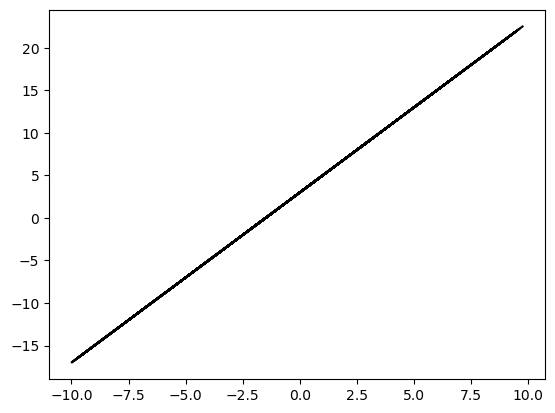

In [19]:
# Y = aX + b
a = 2
b = 3
n = 100
X = np.random.uniform(low = -10,high = 10,size=n)
Y = 2*X+3
plt.plot(X,Y,color = 'black')

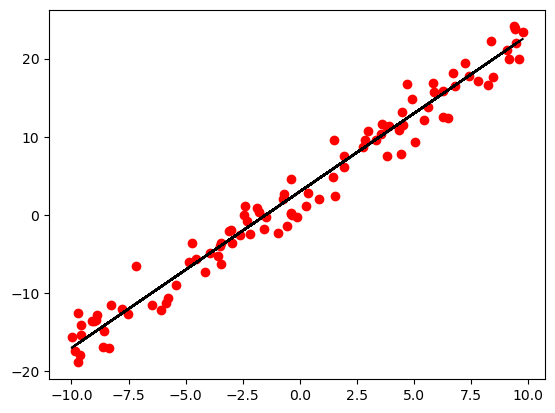

In [20]:
sd = 2
noisy_Y = Y + sd*np.random.randn(n)
plt.plot(X,Y,color = 'black')
plt.scatter(X,noisy_Y,color = 'red')
plt.show()

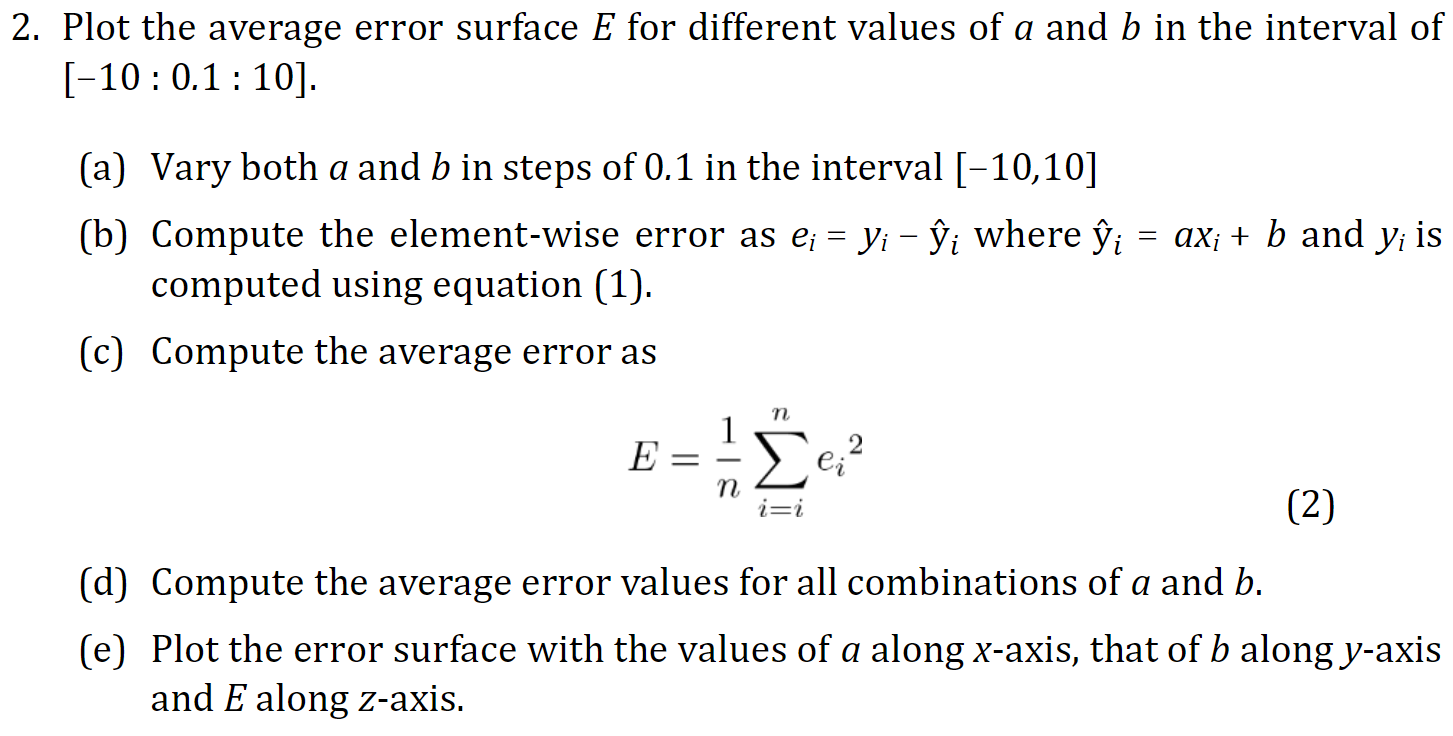

In [21]:
A = np.linspace(-10,10,200)
B = np.linspace(-10,10,200)
# A = np.array([1,1.5,2,2.5,3])
# B = np.array([2,2.5,3,3.5,4])
print(noisy_Y.shape)
print((a*X+b).shape)
Error = []
for a in A:
    for b in B:
        error = np.sum(np.square(noisy_Y - (a*X+b)))/n
        Error.append(error)

Error = np.array(Error)
A,B = np.meshgrid(A,B)
Error = Error.reshape(A.shape)
print(Error.shape)

(100,)
(100,)
(200, 200)


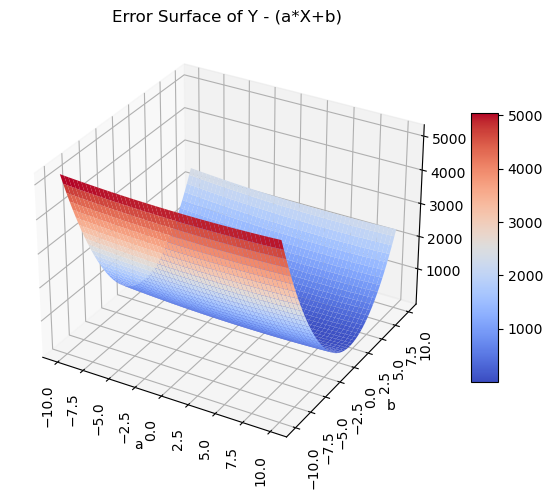

In [22]:
#plt.subplots(subplot_kw={"projection": "3d"})      
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(A, B, Error,cmap = 'coolwarm')
z_axis = Error.copy()
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title("Error Surface of Y - (a*X+b)")
plt.xticks(rotation=90)
plt.xlabel("a")
plt.yticks(rotation=90)
plt.ylabel("b")
plt.show()

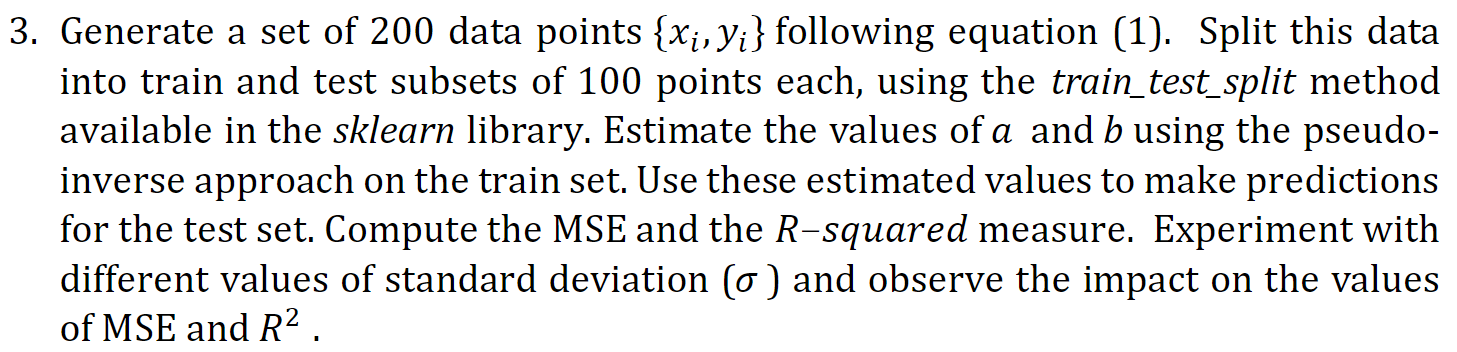

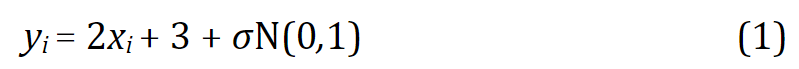

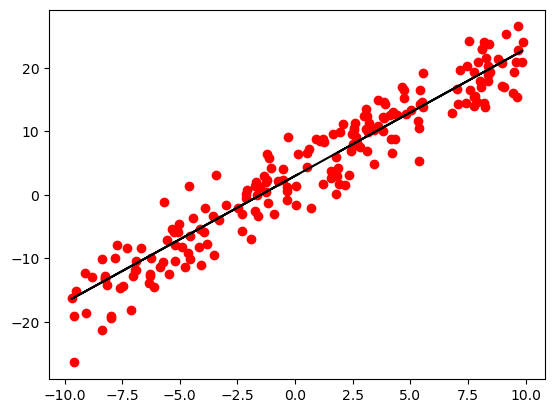

In [23]:
# Y = aX + b

a = 2
b = 3
n = 200
sd = 3

X = np.random.uniform(low = -10,high = 10,size=n)
Y = 2*X+3

noisy_Y = Y + sd*np.random.randn(n)
# data = np.hstack((X.reshape(-1,1),noisy_Y.reshape(-1,1)))
# print(data.shape)

plt.plot(X,Y,color = 'black')
plt.scatter(X,noisy_Y,color = 'red')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,noisy_Y,test_size = 0.5,random_state=1)

In [25]:
At_A = np.array([n,np.sum(x_train),np.sum(x_train),np.sum(np.square(x_train))]).reshape(2,2)
inv_At_A = np.linalg.inv(At_A)
At_Y = np.array([np.sum(x_train),np.sum(x_train*y_train)]).reshape(-1,1)
parameters = np.matmul(inv_At_A,At_Y)

a = parameters[1]
b = parameters[0]

y_pred = a*x_test+b

MSE = np.sum(np.square(y_test - y_pred))/n
mean = np.sum(y_test)/n
squ_R = 1 - (np.sum(np.square(y_test - y_pred))/np.sum(np.square(y_test - mean)))

print("MSE : ",MSE)
print("R_square :",squ_R)

MSE :  9.711136170553443
R_square : 0.873618515678658


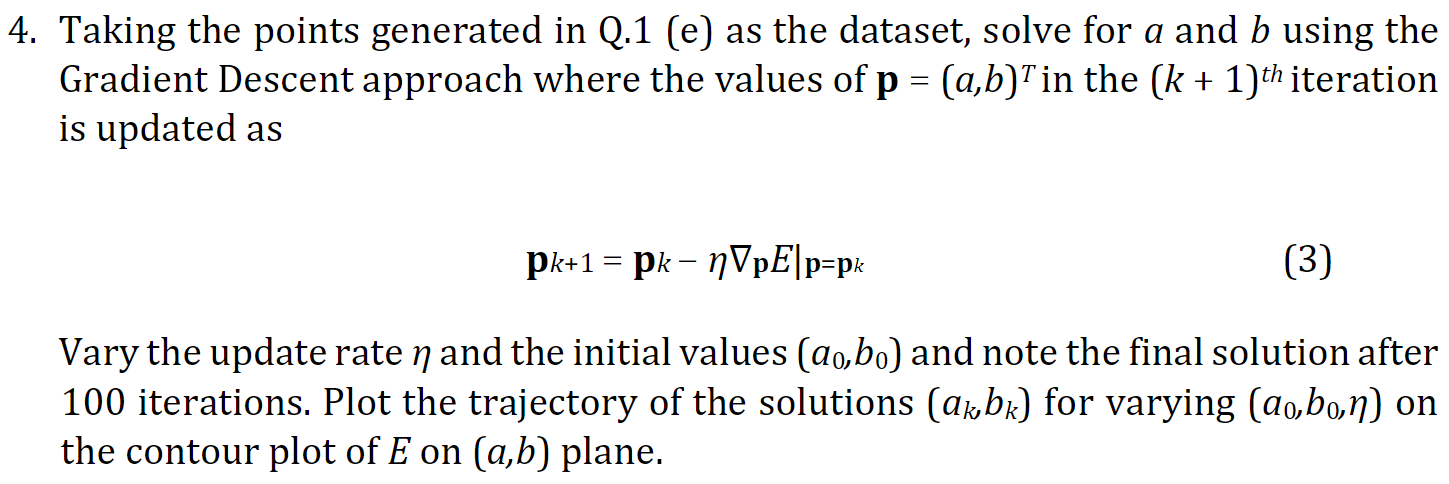

[[2.81410184]
 [2.06182071]]


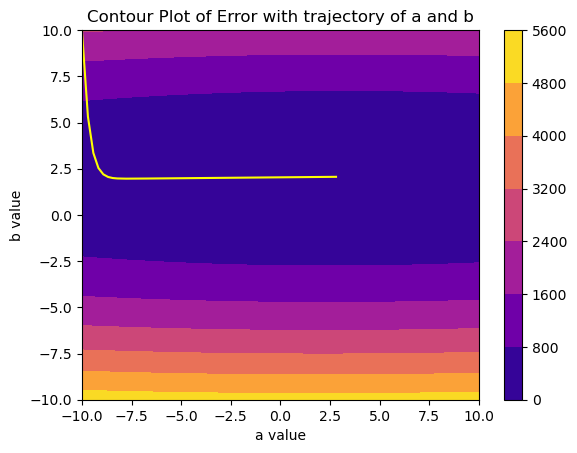

In [26]:
surf = plt.contourf(A,B,z_axis,cmap = 'plasma')
a = 2
b = 3
n = 100
X = np.random.uniform(low = -10,high = 10,size=n)
Y = a*X+b

sd = 2 # add's noise
noisy_Y = Y + sd*np.random.randn(n)

X = X.reshape(-1,1)
Y = noisy_Y.reshape(-1,1)
ones = np.ones(n).reshape(-1,1)
A = np.hstack((ones,X))
P = np.array([-10,10]).reshape(-1,1)
#print(P)
learn_rate = 0.01
k = 200
At_Y = (-2/n) * np.matmul(A.T,Y)
At_A = (2/n) * np.matmul(A.T,A)
Points = []
while k > 0:
    Points.append(P)
    #Error.append(np.sum(Y - np.matmul(A,P)))
    P = P - learn_rate*(At_Y+np.matmul(At_A,P))
    k-=1
print(P)    
P = np.array(Points)
plt.plot(P[:,0],P[:,1],color = 'yellow' )
plt.title("Contour Plot of Error with trajectory of a and b")
plt.xlabel("a value")
plt.ylabel("b value")
plt.colorbar()
plt.show()